In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2018-01-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-01-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675   Ìï¥Ïö¥ÎåÄÍµ¨   8067   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2018-01-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2018-01-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2500   Ìï¥Ïö¥ÎåÄÍµ¨   2790   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2018-01-04     ÎåÄÌåå                      1.0„éè   3100   Ìï¥Ïö¥ÎåÄÍµ¨   3790   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2018-01-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8400   Ìï¥Ïö¥ÎåÄÍµ¨  10950   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2018-01-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4078   Ìï¥Ïö¥ÎåÄÍµ¨   4632   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2018-01-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2018-01-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2018-01-04      Î¨¥                   2.0„éè 1Í∞ú   1196   Ìï¥Ïö¥ÎåÄÍµ¨   2602   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2018-01-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   4112   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2018-01-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2854   Ìï¥Ïö¥ÎåÄÍµ¨   3980   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2018-01-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  11970   Ìï¥Ïö¥ÎåÄÍµ¨  18000   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2018-01-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1239   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2018-01-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2586   Ìï¥Ïö¥ÎåÄÍµ¨   6562   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2018-01-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  14800   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2018-01-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  10837   Ìï¥Ïö¥ÎåÄÍµ¨  18600   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2018-01-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2018-01-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2018-01-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2018-01-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29950   Ìï¥Ïö¥ÎåÄÍµ¨  40000   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2018-01-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2018-01-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900   Ìï¥Ïö¥ÎåÄÍµ¨  45900   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2018-01-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1916   Ìï¥Ïö¥ÎåÄÍµ¨   2279   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2018-01-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    780   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2018-01-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5650   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2018-01-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2400   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2018-01-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380   Ìï¥Ïö¥ÎåÄÍµ¨   3300   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2018-01-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793   Ìï¥Ïö¥ÎåÄÍµ¨  24785   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1392   20.85%   7,389  
1     950   15.08%   6,633  
2     290    11.6%   2,657  
3     690   22.26%   3,388  
4    2550   30.36%   9,417  
5     554   13.59%   4,358  
6       0     0.0%     676  
7      10    0.71%   1,407  
8    1406  117.56%   2,085  
9    1032   33.51%   3,569  
10   1126   39.45%   3,322  
11   6030   50.38%  14,245  
12   1451  117.11%   2,203  
13   3976  153.75%   4,671  
14   1300    9.63%  14,033  
15   7763   71.63%  14,746  
16    800   48.48%   2,183  
17     50    3.16%   1,613  
18      0     0.0%   1,190  
19  10050   33.56%  34,283  
20   2820   56.63%   6,420  
21   6000   15.04%  43,867  
22    363   18.95%   2,142  
23     50    6.85%     747  
24  

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2018-04-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-04-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6445   Ìï¥Ïö¥ÎåÄÍµ¨   8175   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2018-04-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2018-04-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   1750   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2018-04-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4666   Ìï¥Ïö¥ÎåÄÍµ¨   7237   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2018-04-05     ÎåÄÌåå                      1.0„éè   2484   Ìï¥Ïö¥ÎåÄÍµ¨   2990   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2018-04-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900   Ìï¥Ïö¥ÎåÄÍµ¨  13950   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2018-04-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4078   Ìï¥Ïö¥ÎåÄÍµ¨   4632   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2018-04-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2018-04-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2018-04-05      Î¨¥                   2.0„éè 1Í∞ú   2087   Ìï¥Ïö¥ÎåÄÍµ¨   4438   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2018-04-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   4112   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2018-04-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú   9725   Ìï¥Ïö¥ÎåÄÍµ¨  24798   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2018-04-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3259   Ìï¥Ïö¥ÎåÄÍµ¨   3990   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2018-04-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2586   Ìï¥Ïö¥ÎåÄÍµ¨   6562   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2018-04-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13800   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2018-04-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11975   Ìï¥Ïö¥ÎåÄÍµ¨  20668   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2018-04-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2018-04-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2018-04-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2018-04-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  32900   Ìï¥Ïö¥ÎåÄÍµ¨  44000   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2018-04-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2018-04-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  41900   Ìï¥Ïö¥ÎåÄÍµ¨  46990   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2018-04-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1690   Ìï¥Ïö¥ÎåÄÍµ¨   1911   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2018-04-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    780   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2018-04-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2018-04-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2018-04-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190   Ìï¥Ïö¥ÎåÄÍµ¨   3456   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2018-04-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793   Ìï¥Ïö¥ÎåÄÍµ¨  24785   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1730   26.84%   7,348  
1     950   15.08%   6,633  
2     930   53.14%   2,240  
3    2571    55.1%   5,794  
4     506   20.37%   2,691  
5    6050   76.58%  10,250  
6     554   13.59%   4,358  
7       0     0.0%     676  
8      10    0.71%   1,407  
9    2351  112.65%   3,451  
10   1032   33.51%   3,569  
11  15073  154.99%  19,147  
12    731   22.43%   3,538  
13   3976  153.75%   4,208  
14    300    2.22%  13,600  
15   8693   72.59%  15,260  
16    801   48.57%   2,183  
17     50    3.16%   1,613  
18      0     0.0%   1,190  
19  11100   33.74%  39,783  
20   2820   56.63%   6,553  
21   5090   12.15%  44,897  
22    221   13.08%   1,767  
23     50    6.85%     747  
24

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2018-07-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-07-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨   8067   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2018-07-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2018-07-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2000   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2018-07-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4600   Ìï¥Ïö¥ÎåÄÍµ¨   6237   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2018-07-05     ÎåÄÌåå                      1.0„éè   2456   Ìï¥Ïö¥ÎåÄÍµ¨   2992   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2018-07-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  10400   Ìï¥Ïö¥ÎåÄÍµ¨  16450   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2018-07-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4078   Ìï¥Ïö¥ÎåÄÍµ¨   4632   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2018-07-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2018-07-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2018-07-05      Î¨¥                   2.0„éè 1Í∞ú   1780   Ìï¥Ïö¥ÎåÄÍµ¨   3316   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2018-07-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2018-07-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7487   Ìï¥Ïö¥ÎåÄÍµ¨  12645   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2018-07-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  14000   Ìï¥Ïö¥ÎåÄÍµ¨  21353   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2018-07-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2586   Ìï¥Ïö¥ÎåÄÍµ¨   3476   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2018-07-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900   Ìï¥Ïö¥ÎåÄÍµ¨  13800   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2018-07-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11571   Ìï¥Ïö¥ÎåÄÍµ¨  18438   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2018-07-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2018-07-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1680   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2018-07-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2018-07-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45990   Ìï¥Ïö¥ÎåÄÍµ¨  56900   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2018-07-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1176   Ìï¥Ïö¥ÎåÄÍµ¨   1474   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2018-07-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    780   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2018-07-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2018-07-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2018-07-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490   Ìï¥Ïö¥ÎåÄÍµ¨   3456   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2018-07-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12642   Ìï¥Ïö¥ÎåÄÍµ¨  25822   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     642    8.65%   7,639  
1     950   15.08%   6,633  
2     680    34.0%   2,357  
3    1637   35.59%   5,335  
4     536   21.82%   2,661  
5    6050   58.17%  12,750  
6     554   13.59%   4,358  
7       0     0.0%     676  
8      10    0.71%   1,407  
9    1536   86.29%   2,354  
10    436   14.16%   3,295  
11   5158   68.89%  10,020  
12   7353   52.52%  16,749  
13    890   34.42%   3,087  
14   2900   26.61%  12,733  
15   6867   59.35%  14,373  
16    801   48.57%   2,183  
17    100    6.33%   1,630  
18      0     0.0%   1,190  
19  10910   23.72%  50,897  
20    298   25.34%   1,282  
21     50    6.85%     747  
22   2310   46.39%   6,507  
23    200    8.51%   2,465  
24    966    38.8%   2,815  
25  13180  104.26%  19,788

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2018-10-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-10-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5925   Ìï¥Ïö¥ÎåÄÍµ¨   8067   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2018-10-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2018-10-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2741   Ìï¥Ïö¥ÎåÄÍµ¨   3417   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2018-10-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2480   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2018-10-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4666   Ìï¥Ïö¥ÎåÄÍµ¨   8112   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2018-10-11     ÎåÄÌåå                      1.0„éè   5000   Ìï¥Ïö¥ÎåÄÍµ¨   6097   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2018-10-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9000   Ìï¥Ïö¥ÎåÄÍµ¨  14950   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2018-10-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4188   Ìï¥Ïö¥ÎåÄÍµ¨   4632   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2018-10-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    656   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2018-10-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2018-10-11      Î¨¥                   2.0„éè 1Í∞ú   3320   Ìï¥Ïö¥ÎåÄÍµ¨   3757   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2018-10-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   4395   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2018-10-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3657   Ìï¥Ïö¥ÎåÄÍµ¨  12487   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2018-10-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  15107   Ìï¥Ïö¥ÎåÄÍµ¨  22846   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2018-10-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2492   Ìï¥Ïö¥ÎåÄÍµ¨   3956   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2018-10-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3115   Ìï¥Ïö¥ÎåÄÍµ¨   5226   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2018-10-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T   9900   Ìï¥Ïö¥ÎåÄÍµ¨  13800   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2018-10-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15120   Ìï¥Ïö¥ÎåÄÍµ¨  23800   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2018-10-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2018-10-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1680   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2018-10-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2018-10-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Ìï¥Ïö¥ÎåÄÍµ¨   8964   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2018-10-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51990   Ìï¥Ïö¥ÎåÄÍµ¨  56900   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2018-10-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É    996   Ìï¥Ïö¥ÎåÄÍµ¨   1561   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2018-10-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2018-10-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2018-10-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2018-10-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190   Ìï¥Ïö¥ÎåÄÍµ¨   3456   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2018-10-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12642   Ìï¥Ïö¥ÎåÄÍµ¨  25822   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    2142   36.15%   7,139  
1     950   15.08%   6,633  
2     676   24.66%   2,969  
3     210    8.47%   2,583  
4    3446   73.85%   6,159  
5    1097   21.94%   5,440  
6    5950   66.11%  11,283  
7     444    10.6%   4,395  
8      20    3.05%     669  
9      10    0.71%   1,407  
10    437   13.16%   3,506  
11   1315   42.69%   3,588  
12   8830  241.45%   7,515  
13   7739   51.23%  19,311  
14   1464   58.75%   3,236  
15   2111   67.77%   3,847  
16   3900   39.39%  11,500  
17   8680   57.41%  18,046  
18    801   48.57%   2,183  
19    100    6.33%   1,630  
20      0     0

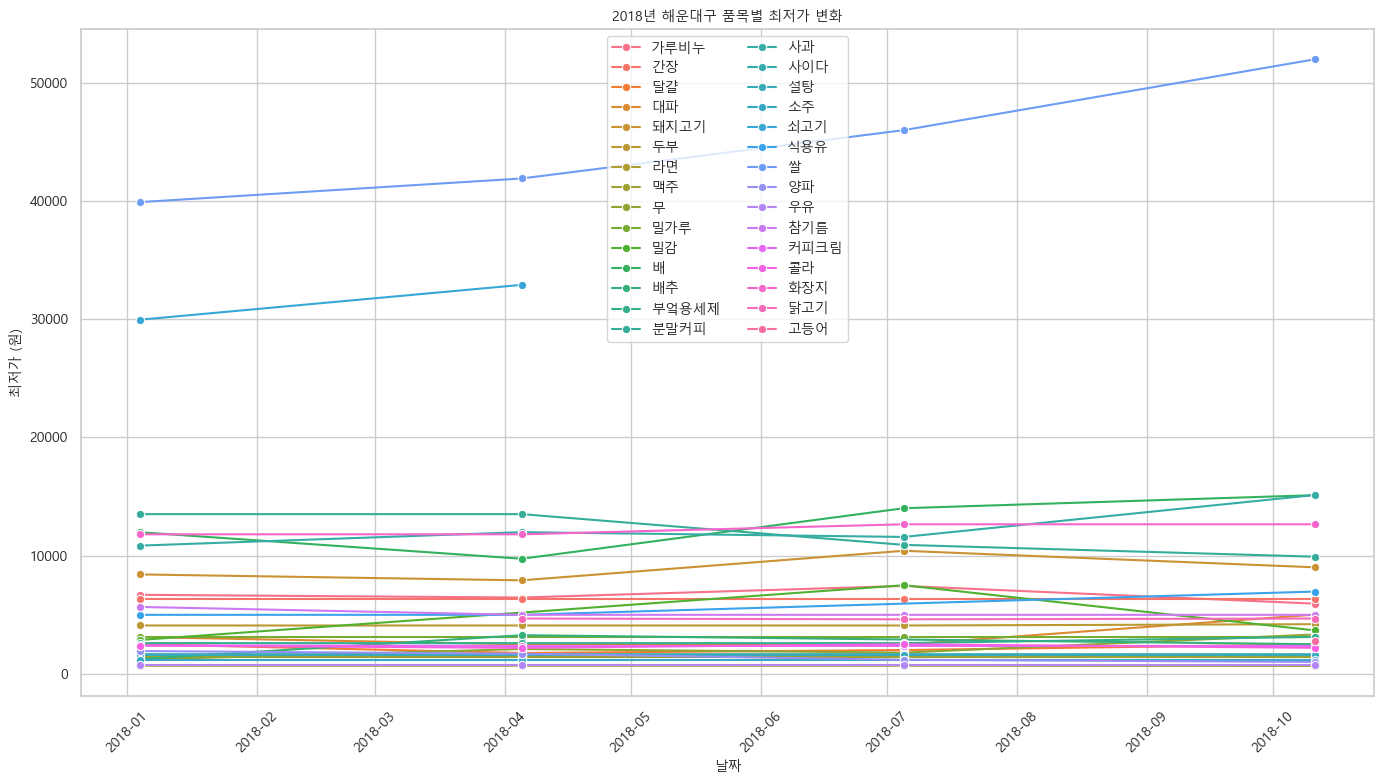

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_min.csv", index=False, encoding="utf-8-sig")

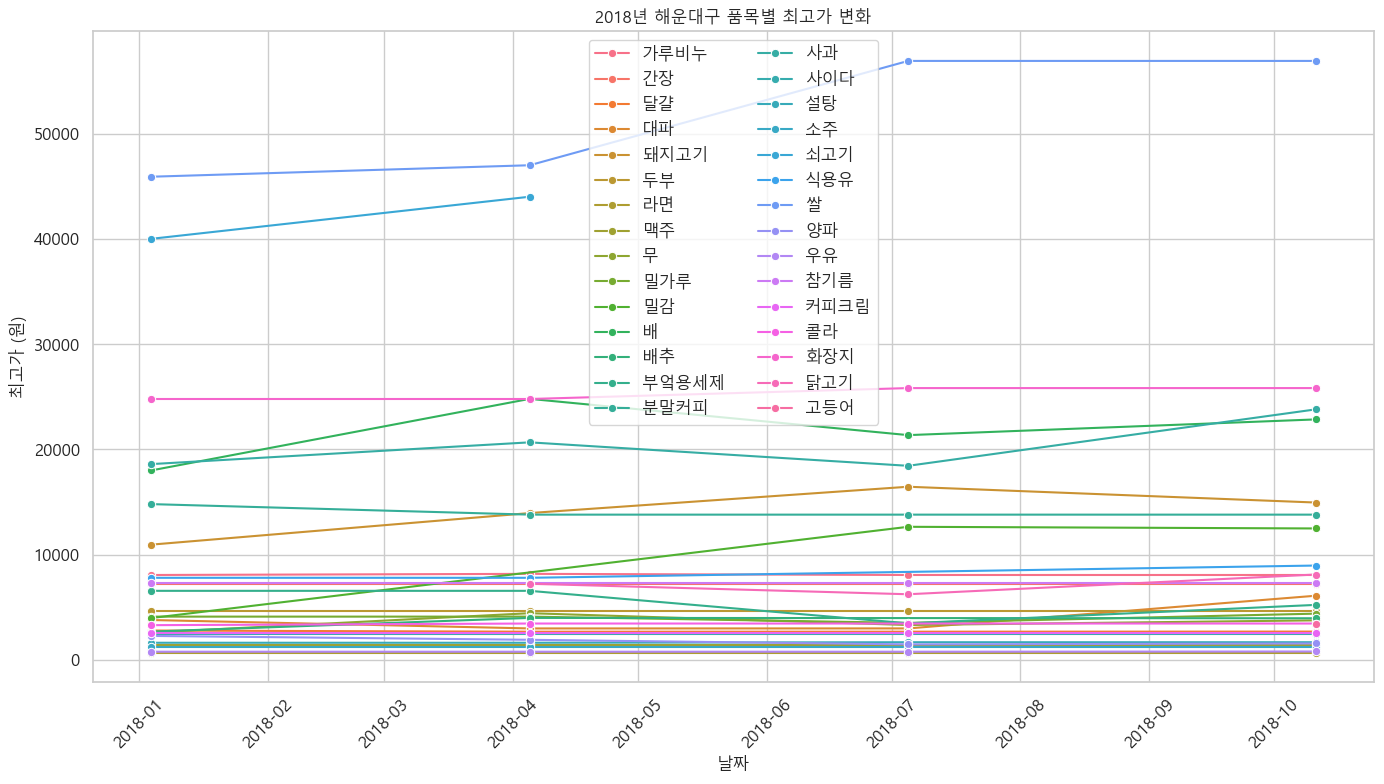

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2018_max.csv", index=False, encoding="utf-8-sig")